In [4]:
import math
import numpy as np 
import matplotlib.pyplot as plt



In [10]:
def f(x):
    return 2*x**2 -5*x +5 

In [11]:
f(3)

8

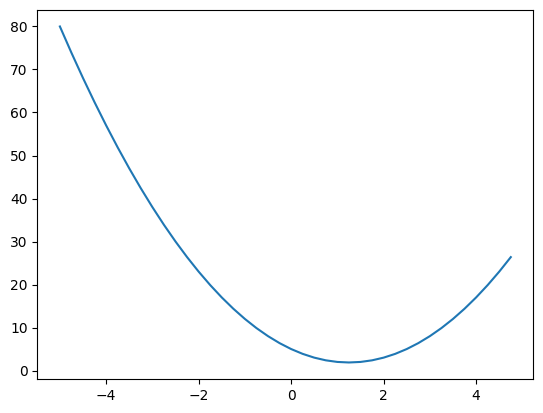

In [12]:
xs=np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [25]:
h=0.00001
x=4.0
(f(x+h)-f(x))/h

11.000019999229947

In [20]:
class Value:
    def __init__(self,data, _child=(),_op=''):
        self.data=data
        self.prev=set(_child)
        self.grad=0.0
        self._backward=lambda:None
        self._op=_op
        

    def __repr__(self): 
        return f"value(data={self.data}" 
     
    def __add__(self,other):
        out=Value(self.data+other.data,(self,other),'+') 
        def __backward():
            self.gard=1.0*out.grad
            other.grad=1.0*out.grad
            out._backward=_backward

        return out
    
    def __mul__(self,other):
        out=Value(self.data+other.data,(self,other),'*') 
        def __backward():
            self.gard=other*out.grad
            other.grad=other*out.grad
            out._backward=_backward
        return out
    def tanh(self):
        x=self.data
        t =(math.exp(2*x)-1)/(math.exp(2*x)+1)

        out=Value(t,(self,))
        def _backward():
          self.grad=(1-t**2)* out.grad
        out._backward =_backward
        return out


    
a =Value(3.0)
b=Value(-2.0)
c=Value(5.0)




weights and bias comming in:)

In [27]:
#inputs x1 x2
x1=Value(2.0)
x2=Value(3.0)
#weights w1 w2
w1=Value(-3.0)
w2=Value(1.0)
#bias b
b=Value(6.7)
#x1w1*x2w2 + b
x1w1=x1*w1
x2w2=x2*w2

x1w1x2w2=x1w1*x2w2

n=x1w1x2w2+b;
o=n.tanh();
o.grad=1.0
A=o._backward()
B=n._backward()
print(A)
print(B)

None
None
